# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset yang digunakan**: Iris Dataset dari UCI Machine Learning Repository

**Deskripsi**: Dataset klasifikasi bunga iris dengan 3 spesies (setosa, versicolor, virginica) berdasarkan 4 fitur pengukuran (sepal length, sepal width, petal length, petal width).

**Sumber**: https://archive.ics.uci.edu/ml/datasets/iris

**Jumlah Sampel**: 150 sampel
**Jumlah Fitur**: 4 fitur numerik
**Target**: 3 kelas (species)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library untuk data manipulation dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import library untuk modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Setting visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
# Memuat dataset Penguins
df = sns.load_dataset("penguins")

print("Dataset berhasil dimuat!")
print(f"Ukuran dataset: {df.shape}")
print("\nSampel 5 baris pertama:")
df.head()
df.to_csv('../penguins_raw.csv', index=False)

Dataset berhasil dimuat!
Ukuran dataset: (344, 7)

Sampel 5 baris pertama:


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

INFORMASI DATASET

Jumlah baris: 344
Jumlah kolom: 7

Tipe data:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Informasi statistik:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

CEK MISSING VALUES
species               0
island                0
bill_le

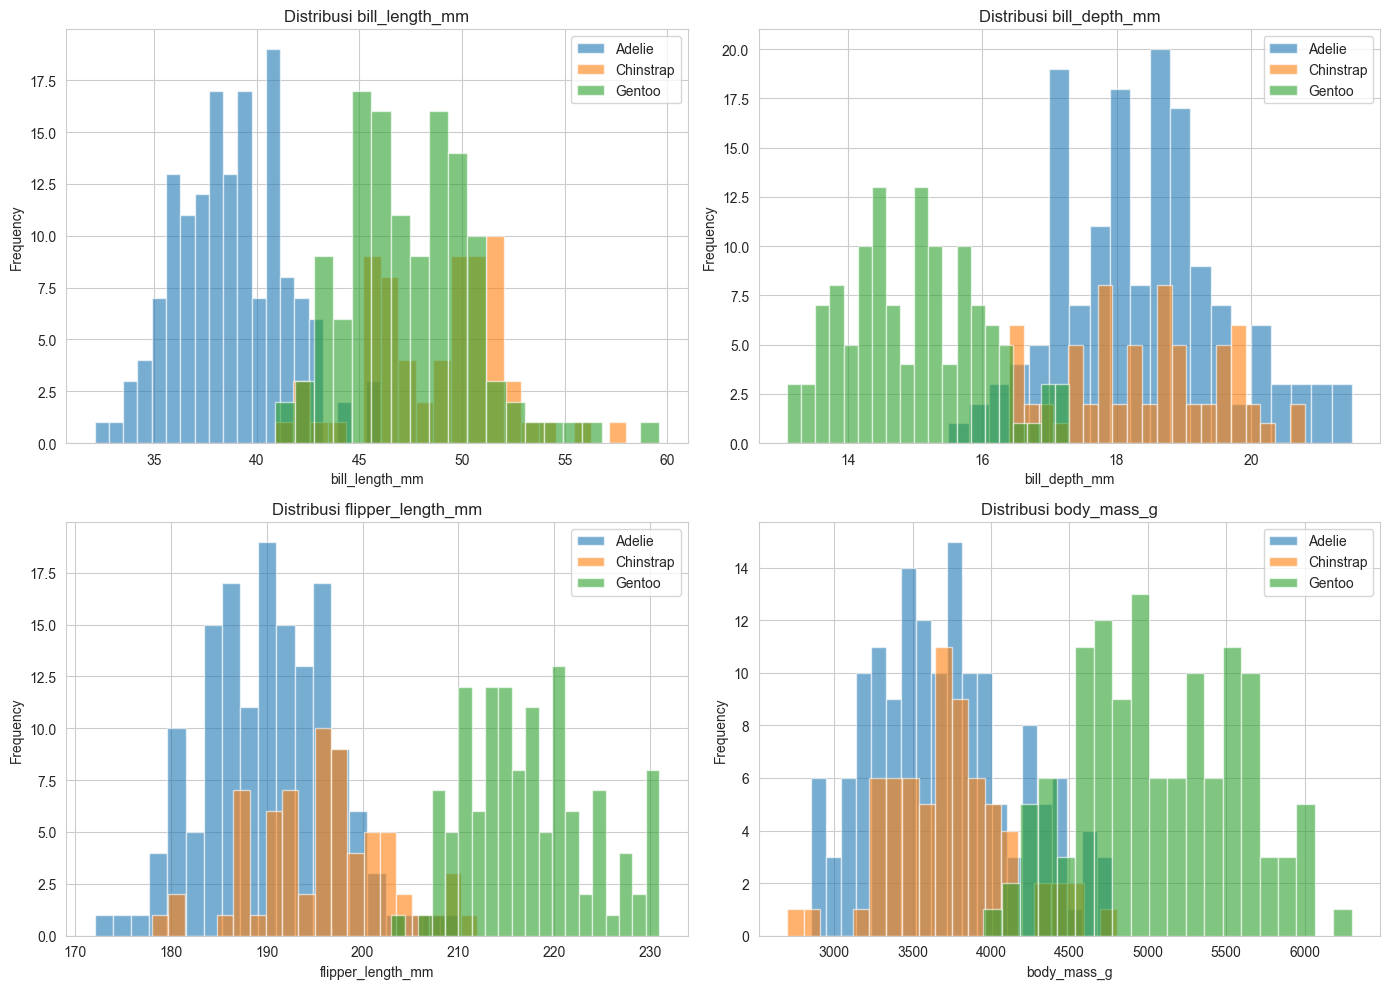


KORELASI ANTAR FITUR


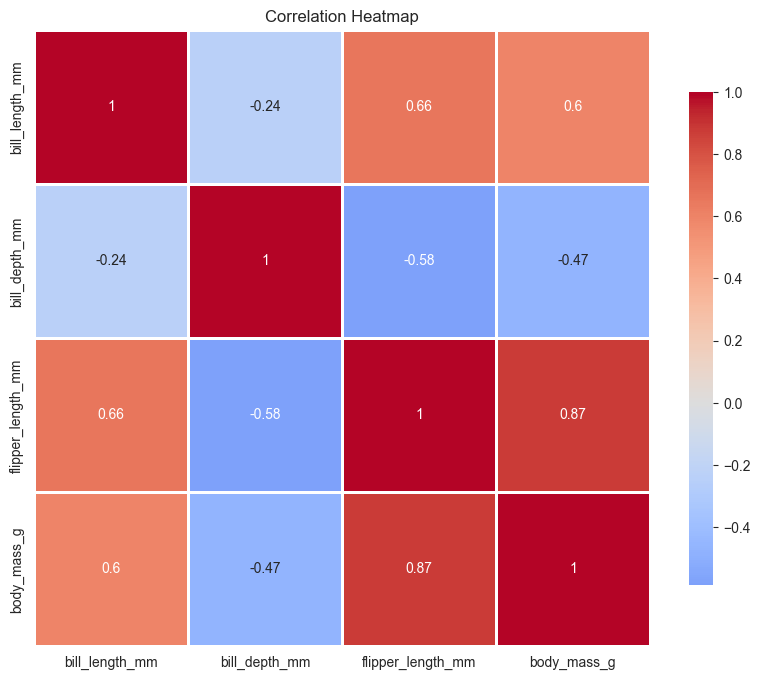


Membuat Pairplot...


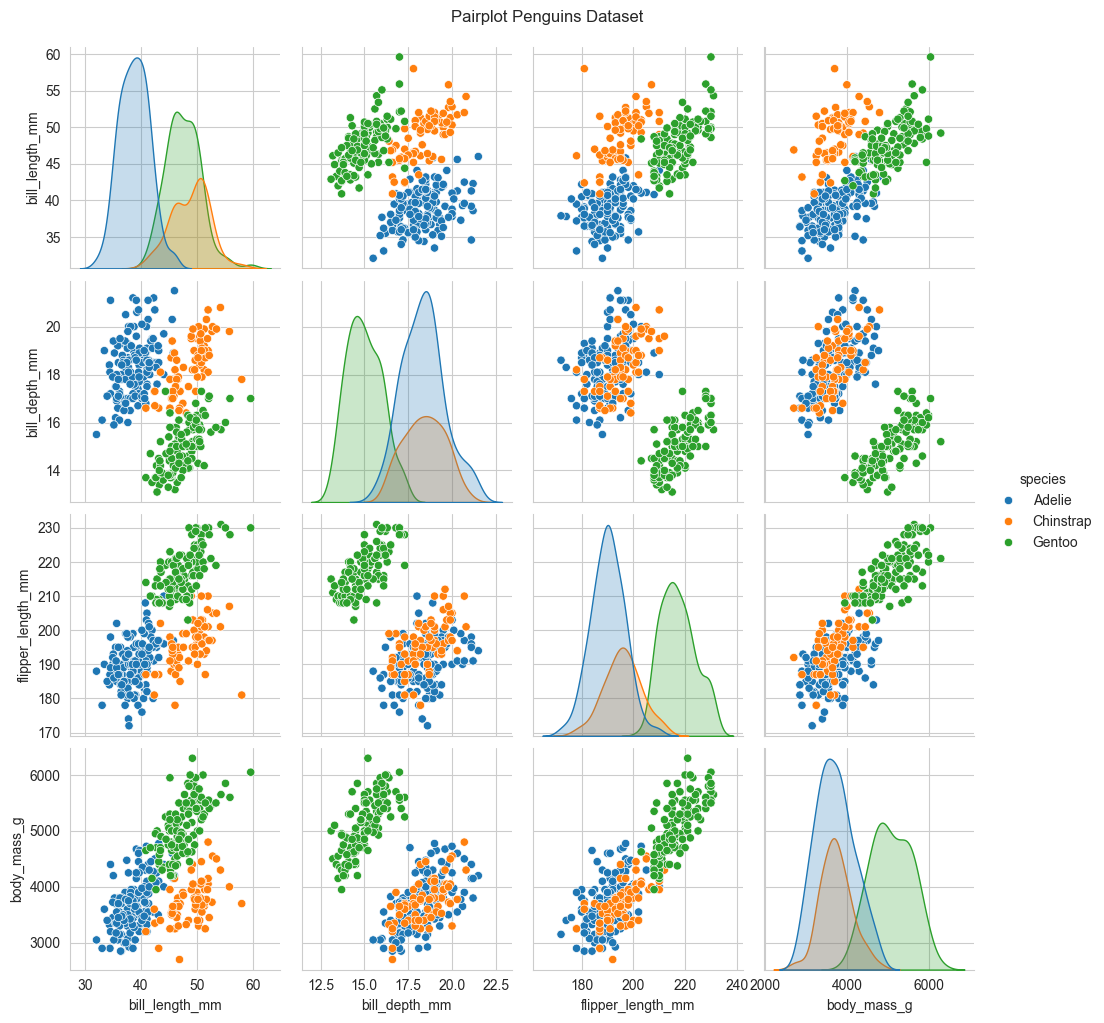

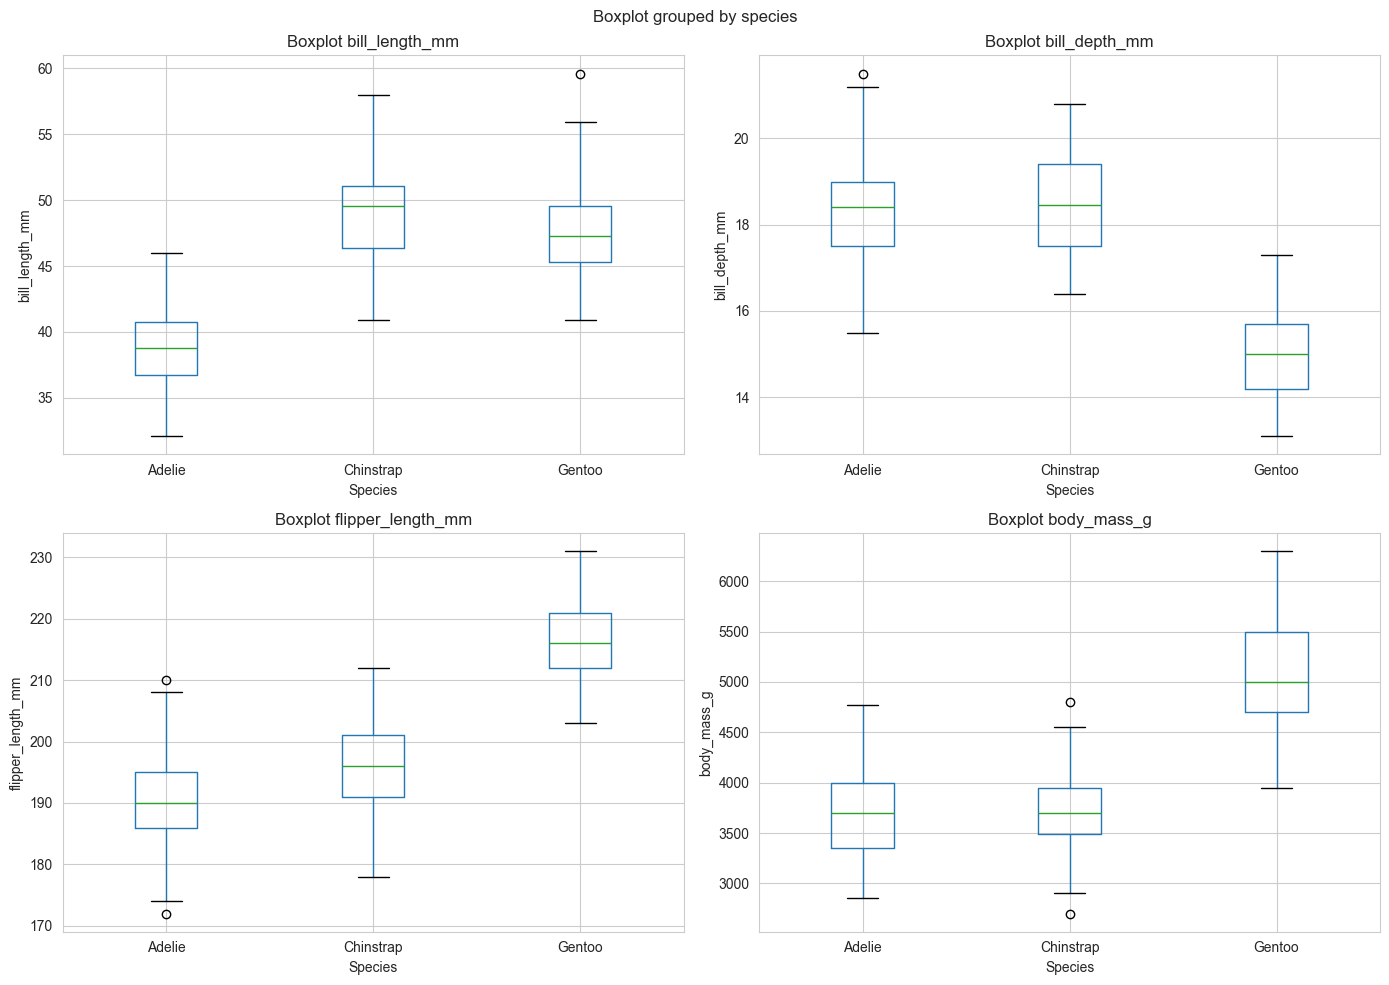

In [6]:
# 4.1 Informasi Dasar Dataset
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nTipe data:")
print(df.dtypes)
print("\nInformasi statistik:")
print(df.describe())

# 4.2 Cek Missing Values
print("\n" + "=" * 50)
print("CEK MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())

# 4.3 Cek Data Duplikat
print("\n" + "=" * 50)
print("CEK DATA DUPLIKAT")
print("=" * 50)
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# 4.4 Distribusi Kelas Target
print("\n" + "=" * 50)
print("DISTRIBUSI KELAS TARGET")
print("=" * 50)
print(df['species'].value_counts())

# 4.5 Visualisasi Distribusi Fitur
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for idx, col in enumerate(feature_cols):
    ax = axes[idx // 2, idx % 2]
    for species in df['species'].dropna().unique():
        subset = df[df['species'] == species]
        ax.hist(subset[col].dropna(), alpha=0.6, label=species, bins=20)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribusi {col}')
    ax.legend()

plt.tight_layout()
plt.show()

# 4.6 Correlation Heatmap
print("\n" + "=" * 50)
print("KORELASI ANTAR FITUR")
print("=" * 50)
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

# 4.7 Pairplot
print("\nMembuat Pairplot...")
sns.pairplot(df.dropna(), hue='species', vars=feature_cols, diag_kind='kde')
plt.suptitle('Pairplot Penguins Dataset', y=1.02)
plt.show()

# 4.8 Boxplot untuk deteksi outlier
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, col in enumerate(feature_cols):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=col, by='species', ax=ax)
    ax.set_title(f'Boxplot {col}')
    ax.set_xlabel('Species')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# 5.1 Handling Missing Values
print("Sebelum preprocessing:")
print(f"Missing values: {df.isnull().sum().sum()}")

# Hapus missing values
df_clean = df.dropna()
print(f"\nSetelah menghapus missing values: {df_clean.isnull().sum().sum()}")

# 5.2 Handling Duplicates
print(f"\nData duplikat sebelum dihapus: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Data duplikat setelah dihapus: {df_clean.duplicated().sum()}")

# 5.3 Feature Selection - Pisahkan fitur dan target
X = df_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_clean['species']

print(f"\nUkuran X: {X.shape}")
print(f"Ukuran y: {y.shape}")

# 5.4 Split Data - Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nX_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# 5.5 Feature Scaling - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk kemudahan
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nContoh data setelah scaling:")
print(X_train_scaled.head())

# 5.6 Simpan data yang sudah dipreprocessing
# Gabungkan X dan y untuk disimpan
train_preprocessed = X_train_scaled.copy()
train_preprocessed['species'] = y_train.values

test_preprocessed = X_test_scaled.copy()
test_preprocessed['species'] = y_test.values

# Simpan ke CSV
import os
os.makedirs('penguins_preprocessing', exist_ok=True)

train_preprocessed.to_csv('penguins_preprocessing/penguins_train_preprocessed.csv', index=False)
test_preprocessed.to_csv('penguins_preprocessing/penguins_test_preprocessed.csv', index=False)

print("\n" + "=" * 50)
print("PREPROCESSING SELESAI!")
print("=" * 50)
print("File disimpan:")
print("- penguins_train_preprocessed.csv")
print("- penguins_test_preprocessed.csv")

Sebelum preprocessing:
Missing values: 19

Setelah menghapus missing values: 0

Data duplikat sebelum dihapus: 0
Data duplikat setelah dihapus: 0

Ukuran X: (333, 4)
Ukuran y: (333,)

X_train: (266, 4)
X_test: (67, 4)
y_train: (266,)
y_test: (67,)

Contoh data setelah scaling:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.167325      -1.992311           0.834781     1.082394
1        1.227050       1.255521           0.121247    -0.215642
2        0.879899      -0.520638           1.476961     2.194997
3       -0.472164       0.646552           0.049894    -0.431982
4       -1.166467       1.052531          -1.448527    -1.142811

PREPROCESSING SELESAI!
File disimpan:
- penguins_train_preprocessed.csv
- penguins_test_preprocessed.csv


# **6. Simpan Preprocessing Artifacts**

Simpan objek scaler untuk digunakan pada tahap deployment.

In [8]:
import joblib

# Simpan scaler untuk digunakan saat inference
joblib.dump(scaler, 'scaler.pkl')

print("Scaler berhasil disimpan sebagai 'scaler.pkl'")

Scaler berhasil disimpan sebagai 'scaler.pkl'
